In [171]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
plt.rcParams['figure.dpi'] = 300

In [ ]:
years = '2021-2024'

In [173]:
df = pd.read_excel(f'TAC_{years}.xlsx')
df1 = df
df

,序号,公开(公告)号,标题,专利类型,法律状态/事件,申请日,授权日,发明人,简单同族专利申请数量,摘要,...,引用专利,引用专利数量,非专利引用文献数量,许可类型,5年内被引用次数,质押人,申请年,发明人(全英),摘要(全英),标题(全英)
0,104,EA202290196A1,КОМПОЗИЦИИ ЖИДКИХ ПОВЯЗОК И ИХ ПРИМЕНЕНИЕ В ВЕ...,发明申请,撤回-未指定类型,2021-01-20,-,ПАУЭЛЛ ДЖОНАТАН | ФАРИА НУНО | БАСТОС КАРЛОС П...,22,Описаны композиции жидких повязок для ветерина...,...,-,0,0,-,0,-,2020,ПАУЭЛЛ ДЖОНАТАН | ФАРИА НУНО |,Veterinary liquid dressing compositions for tr...,Composition of liquid bandages and their use i...
1,1688,EG2013111808A0,Jojoba Chitosan films to extend the shelf life...,实用新型,-,2021-01-22,-,Moataz Ahmed El-Sawy Mahmoud | Labiba Ismail H...,1,The present invention relates to mixing jojoba...,...,-,0,0,-,0,-,2013,Moataz Ahmed El-Sawy Mahmoud | Labiba Ismail H...,"The present invention relates to mixed jojoba,...",Jojoba chitosan film can extend the shelf life...
2,1061,EG2017091597A0,Agricultural nano fertilizer,实用新型,-,2021-01-22,-,Yasser Abdul Muttalib Abdul Hadi Abdul Muttalib,1,The subject matter of the invention relates to...,...,-,0,0,-,0,-,2017,Yasser Abdul Muttalib Abdul Hadi Abdul Muttalib,The subject of the invention is the production...,Agricultural Nano Fertilizer
3,604,EG2020091493A0,Method for fertilizing tomato plants in the pr...,实用新型,授权,2021-01-27,-,Shahira Hosseini Muslim | Ahmed Helmy Mohamed ...,1,This request relates to a method for fertilizi...,...,-,0,0,-,0,-,2020,Shahira Hosseini Muslim | Ahmed Helmy Mohamed ...,The petition concerns a method for fertilizing...,A method for fertilizing tomato plants with ma...
4,1687,EG27260A,"Jojoba Chitosan films in agricultural, industr...",发明申请,-,2021-02-01,-,Prof. Dr. Labiba Ismail Hussein Mohamed | Mr. ...,1,The present invention relates to mixing jojoba...,...,-,0,0,-,0,-,2013,Prof. Dr. Labiba Ismail Hussein Mohamed | Mr. ...,"The present invention relates to mixed jojoba,...",Antibacterial effects of jojoba chitosan films...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,1342,ZA201502696B,Pesticide nano-suspension,授权发明,授权,2024-07-24,2016-06-29,"MISSELBROOK, JOHN | DUNN, JEFF",17,"Many active agents, such as insecticides, herb...",...,-,0,0,-,0,-,2015,"MISSELBROOK, JOHN | DUNN, JEFF","Many active agents, such as pesticides, herbic...",Pesticide Nanosuspension
519,778,ZA201907268A,Pesticide,发明申请,公开,2024-08-08,-,"TEO, ENG SOON | MURPHY, BROOK C",17,The present invention relates to a pesticide n...,...,-,0,0,-,0,-,2019,"TEO, ENG SOON | MURPHY, BROOK C",The present invention relates to a pesticide n...,pesticide
520,504,ZA202103919B,Nano-pcr detection kit for infectious bovine r...,授权发明,授权,2024-08-23,2021-10-27,"GUO, LI | WANG, ZHENJUN | ZHAO, LIFENG | LUO, ...",1,The present invention discloses a nano-PCR det...,...,-,0,0,-,0,-,2021,"GUO, LI | WANG, ZHENJUN | ZHAO, LIFENG | LUO, ...",The present invention discloses a nano PCR det...,Infectious bovine rhinotracheitis virus nano-P...
521,358,ZA202203073B,Graphene-like biochar loaded with NANO zero-va...,授权发明,授权,2024-08-23,2022-05-25,FANG LIPING | LIU KAI | RAN QIWANG | MA YIBING,1,This invention provides Graphene-like biochar ...,...,-,0,0,-,0,-,2022,FANG LIPING | LIU KAI | RAN QIWANG | MA YIBING,The present invention provides a graphene-like...,Graphene-like biochar loaded with nano zero-va...


In [176]:
df1 = df1[['摘要 (en)']]
df1

,摘要(全英)
0,Veterinary liquid dressing compositions for tr...
1,"The present invention relates to mixed jojoba,..."
2,The subject of the invention is the production...
3,The petition concerns a method for fertilizing...
5,The subject of the invention relates to the pr...
...,...
515,The present invention relates to a nanomateria...
519,The present invention relates to a pesticide n...
520,The present invention discloses a nano PCR det...
521,The present invention provides a graphene-like...


In [177]:
# Define a function to remove special characters
def truncate_text(text, max_length=500, redundancy=20):
    if len(text) <= max_length:
        return text
    
    # find the last period within the max length
    end_idx_cn = text.rfind('。', 0, max_length)
    # find the last period within the max length
    end_idx_en = text.rfind('.', 0, max_length)
    
    end_idx = max(end_idx_cn, end_idx_en)
    
    if end_idx == -1:
        # If no period is found, force the cut and retain the redundancy
        start_idx = max_length - redundancy if max_length > redundancy else 0
        end_idx = max_length + redundancy if len(text) > max_length + redundancy else len(text)
        return text[start_idx:end_idx]
    else:
        return text[:end_idx + 1]

df1['摘要 (en)'] = df1['摘要 (en)'].apply(lambda x: truncate_text(x, max_length=500))

C:\Users\RIC_ZX\AppData\Local\Temp\ipykernel_78352\2570852981.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel

device = torch.device("cpu")

# load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained(r'distilbert-base-nli-mean-tokens')
# load model
model_path = 'distilbert.pth'
model = DistilBertModel.from_pretrained(r'distilbert-base-nli-mean-tokens')
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)

# get text embedding
def get_text_embedding(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state[:, 0, :] 
    return embedding

text = df1['摘要 (en)'].values.tolist()
embeddings = get_text_embedding(text)
print(embeddings.shape)

torch.Size([416, 768])


In [179]:
embeddings = embeddings.detach().cpu().numpy()
print(embeddings.shape)

(416, 768)


In [181]:
import umap

# 创建 UMAP 模型
umap_model = umap.UMAP(n_components=3, random_state=2022)

# 对向量化矩阵进行降维操作，并将结果转换为 NumPy 数组
umap_embeddings = umap_model.fit_transform(embeddings)
umap_embeddings.shape

C:\Users\RIC_ZX\anaconda3\envs\pytorch\lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



(416, 3)

In [182]:
import plotly.express as px
import pandas as pd

# 创建 DataFrame 包含 UMAP 降维后的结果
df = pd.DataFrame(umap_embeddings, columns=['X', 'Y', 'Z'])

# 可视化 UMAP 结果
fig = px.scatter_3d(df, x='X', y='Y', z='Z', opacity=0.7,labels={'x': 'X', 'y': 'Y', 'z': 'Z'},
                    title='UMAP Visualization')
fig.show()

C:\Users\RIC_ZX\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\RIC_ZX\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\RIC_ZX\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\RIC_ZX\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory le

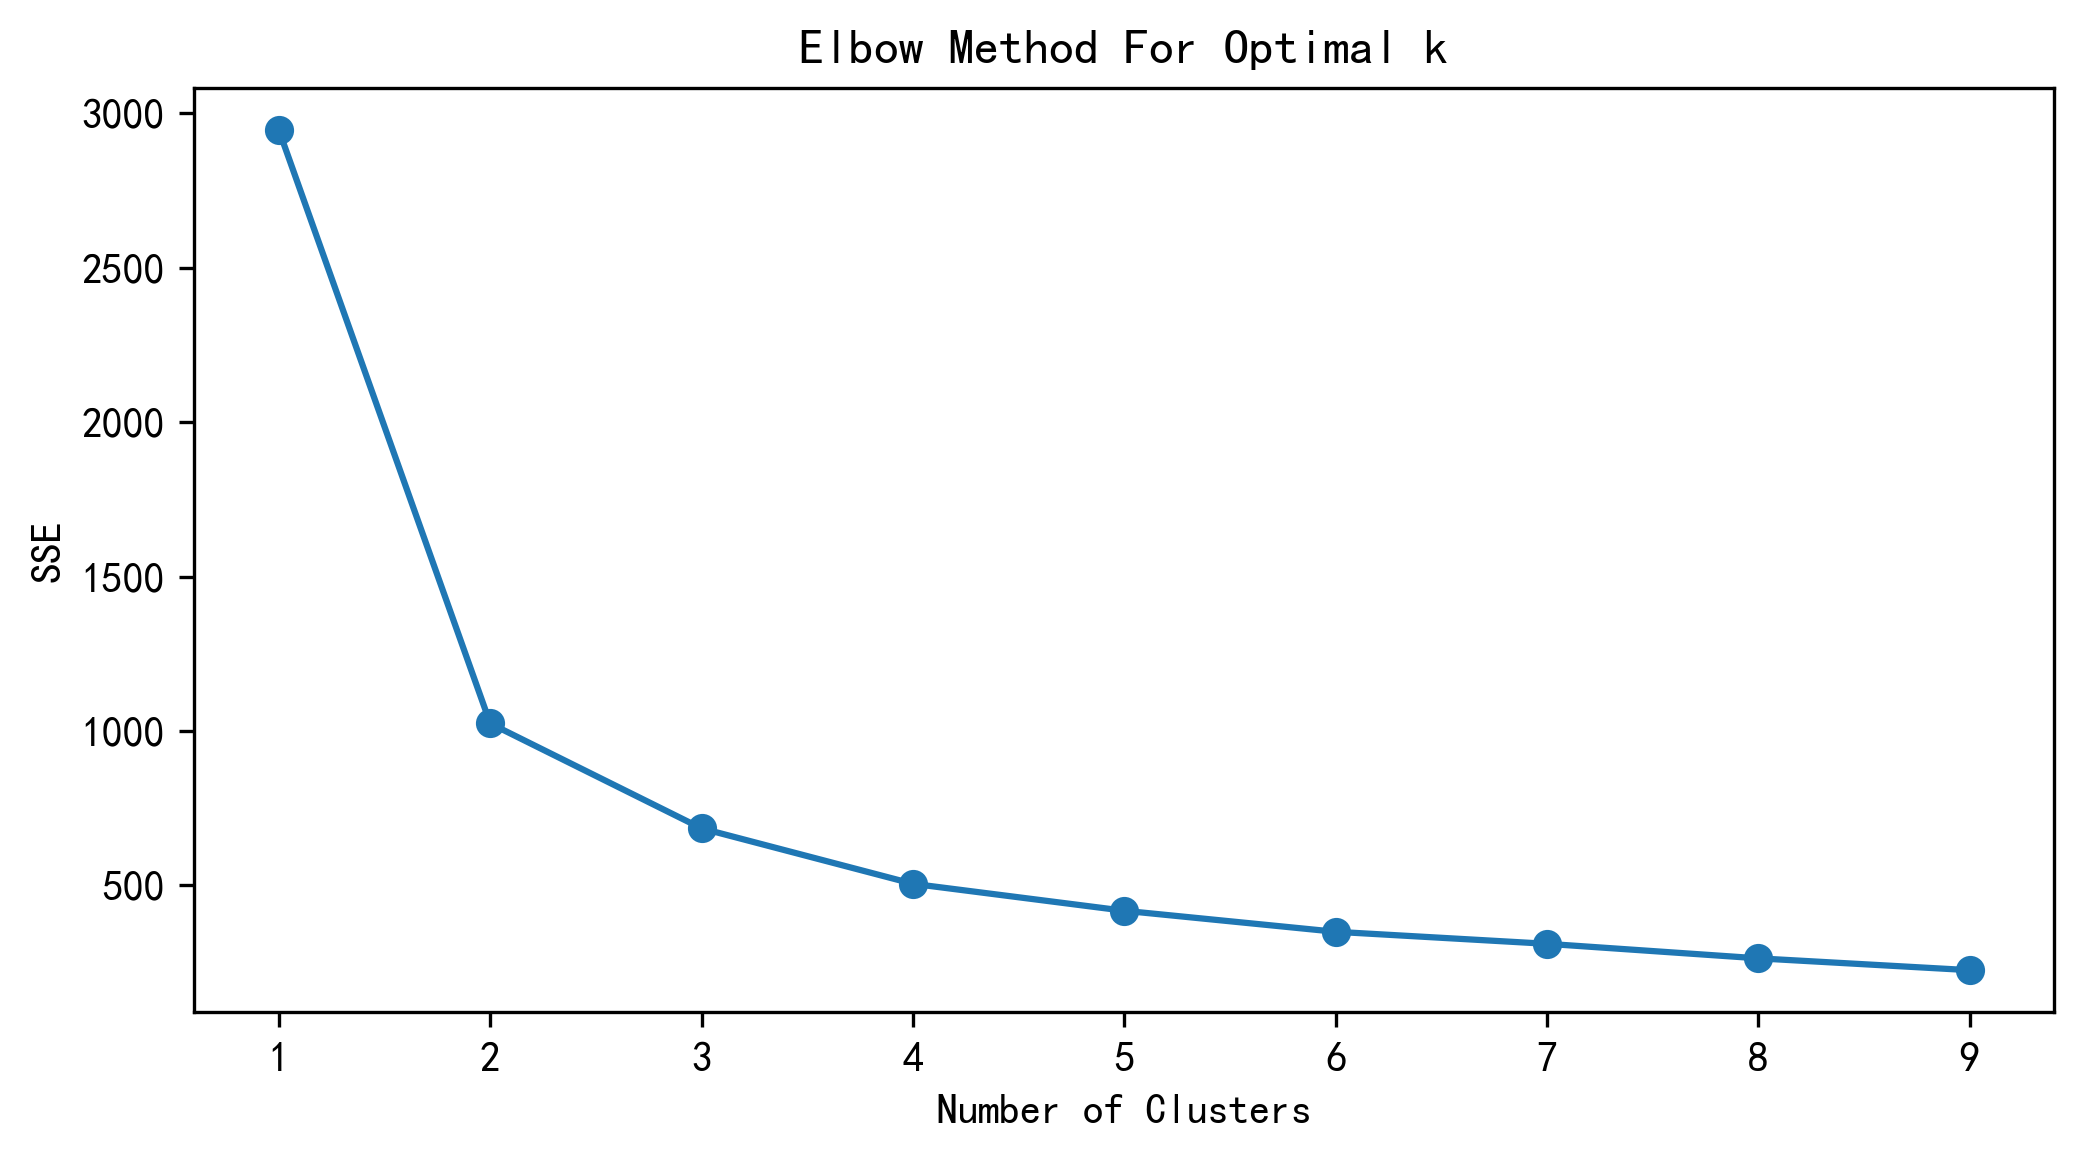

In [183]:
# 选择拐点最大的位置，一般年份越早聚类数量越少
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  

# 计算不同k值对应的SSE  
SSE = []  
for k in range(1, 20):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(umap_embeddings)  
    SSE.append(kmeans.inertia_)  

# 绘制手肘法曲线  
plt.figure(figsize=(8, 4))  
plt.plot(range(1, 20), SSE, 'o-') 
plt.xlabel("Number of Clusters")  
plt.ylabel("SSE")  
plt.title("Elbow Method For Optimal k")  
plt.show()

In [184]:
from sklearn.cluster import KMeans

# KMeans 
cluster_num = 4
cluster = KMeans(n_clusters=cluster_num, random_state=0).fit(umap_embeddings)
labels = cluster.labels_

df['cluster'] = labels

C:\Users\RIC_ZX\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [185]:
df1['cluster'] = cluster.labels_
df1.head()

C:\Users\RIC_ZX\AppData\Local\Temp\ipykernel_78352\351172856.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,摘要(全英),cluster
0,Veterinary liquid dressing compositions for tr...,1
1,"The present invention relates to mixed jojoba,...",1
2,The subject of the invention is the production...,0
3,The petition concerns a method for fertilizing...,0
5,The subject of the invention relates to the pr...,0


In [186]:
df1['cluster'].value_counts()

cluster
2    132
0    120
1    108
3     56
Name: count, dtype: int64

In [187]:
df1.to_excel(f'cluster_{years}.xlsx',index=False)

In [188]:
df2 = df1
df2

,摘要(全英),cluster
0,Veterinary liquid dressing compositions for tr...,1
1,"The present invention relates to mixed jojoba,...",1
2,The subject of the invention is the production...,0
3,The petition concerns a method for fertilizing...,0
5,The subject of the invention relates to the pr...,0
...,...,...
515,The present invention relates to a nanomateria...,0
519,The present invention relates to a pesticide n...,3
520,The present invention discloses a nano PCR det...,1
521,"ting precipitation, and drying. The pres",2


In [189]:
import re
from nltk.corpus import stopwords

# Define a function to filter text
def filter_text(text):    
    # Remove parentheses and their contents
    text = re.sub(r'\([^)]*\)', '', text)
    # Remove all symbols and numbers
    pattern = re.compile(r'[^a-zA-Z\s]')
    text = pattern.sub(' ', text)
    # Tokenize the text into words
    words = text.split()
    # Filter out stopwords, punctuation, pronouns, exclamations, conjunctions, and prepositions
    filtered_words = [word for word in words if word not in stopwords.words('english')]

    # Join the filtered words back into a single string and return
    return ' '.join(filtered_words)

# Apply the filter_text function to the '摘要 (en)' column
df2['摘要 (en)'] = df2['摘要 (en)'].astype(str)
df2['摘要 (en)'] = [filter_text(item) for item in df2['摘要 (en)']]

C:\Users\RIC_ZX\AppData\Local\Temp\ipykernel_78352\3795899985.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\RIC_ZX\AppData\Local\Temp\ipykernel_78352\3795899985.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [190]:
abstract = df2['摘要 (en)']
abstract

0    Veterinary liquid dressing compositions treati...
1    The present invention relates mixed jojoba Chi...
2    The subject invention production magnetic Vero...
3    The petition concerns method fertilizing tomat...
5    The subject invention relates production magne...
Name: 摘要(全英), dtype: object

In [191]:
import pandas as pd
import nltk
def seg_depart(sentence):
    tokens = nltk.word_tokenize(sentence)
    stop_words = set(stopwords.words('english'))
    outstr = ''
    for word in tokens:
        if word.lower() not in stop_words:
            outstr += word
            outstr += " "
    return outstr

df3 = df2
df3['摘要 (en)'] = df3['摘要 (en)'].apply(seg_depart)
df3

C:\Users\RIC_ZX\AppData\Local\Temp\ipykernel_78352\1766107715.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,摘要(全英),cluster
0,Veterinary liquid dressing compositions treati...,1
1,present invention relates mixed jojoba Chitosa...,1
2,subject invention production magnetic Veronano...,0
3,petition concerns method fertilizing tomato pl...,0
5,subject invention relates production magnetic ...,0
...,...,...
515,present invention relates nanomaterial compris...,0
519,present invention relates pesticide nanoemulsi...,3
520,present invention discloses nano PCR detection...,1
521,ting precipitation drying pres,2


In [192]:
df3['cluster'] = cluster.labels_
df3.head()

C:\Users\RIC_ZX\AppData\Local\Temp\ipykernel_78352\638349853.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,摘要(全英),cluster
0,Veterinary liquid dressing compositions treati...,1
1,present invention relates mixed jojoba Chitosa...,1
2,subject invention production magnetic Veronano...,0
3,petition concerns method fertilizing tomato pl...,0
5,subject invention relates production magnetic ...,0


In [193]:
cluster0 = df3[df3['cluster']==0]
cluster0.head()

,摘要(全英),cluster
2,subject invention production magnetic Veronano...,0
3,petition concerns method fertilizing tomato pl...,0
5,subject invention relates production magnetic ...,0
6,petition relates method fertilizing tomato pla...,0
14,Thermoplastic product external applications ag...,0


In [194]:
from keybert import KeyBERT

def get_top_n_words(text, top_n=10):
    model = KeyBERT(r'distilbert-base-nli-mean-tokens')
    keywords = model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words=None, top_n=top_n)
    return keywords
# join text
merged_text = ' '.join(cluster0['摘要 (en)'].tolist())

# extract keywords
keywords = get_top_n_words(merged_text, top_n=10)
keywords

[('biotechnologytechnique', 0.4969),
 ('biofertilizers', 0.4694),
 ('biofertilizer', 0.4541),
 ('horticulture', 0.4116),
 ('nanofertilizers', 0.3763),
 ('fertilizers', 0.3689),
 ('herbicides', 0.3683),
 ('soybean', 0.3668),
 ('tomato', 0.3557),
 ('microbiology', 0.3527)]

In [ ]:
# initialize an empty list to store all clusters
all_clusters = []

# get the summary of each cluster
for i in range(cluster_num):
    cluster = df3[df3['cluster'] == i]
    cluster_summary = ' '.join(cluster['摘要 (en)'].tolist())
    all_clusters.append(cluster_summary)

# save keywords
df4 = []

for i in range(cluster_num):
    common_words = get_top_n_words(all_clusters[i], 10)
    df4.append(common_words)

df5 = pd.DataFrame(df4).T

df5.columns = [f'cluster{i}' for i in range(cluster_num)]

df5

In [197]:
df5.to_excel(f'result_{years}.xlsx',index=False)